In [2]:
import pandas as pd


In [5]:
import os
import matplotlib
import matplotlib.pyplot as plt

Markdown Merge data from month into one csv file

In [26]:
import os
import pandas as pd

path = r"C:\Users\adity\Desktop\PROJECT\DATA"
files = [file for file in os.listdir(path) if not file.startswith('.')]  # ignore hidden files

data_frames = []

for file in files:
    file_path = os.path.join(path, file)

    try:
        # Check if the file is not empty before reading
        if os.path.getsize(file_path) > 0:
            current_data = pd.read_csv(file_path)
            data_frames.append(current_data)
    except pd.errors.EmptyDataError:
        print(f"Warning: Empty data in file {file_path}")

data = pd.concat(data_frames, ignore_index=True)  # Concatenate all DataFrames in the list

data.to_csv("data_copy.csv", index=False)


# read in updated data frame

In [27]:
df = pd.read_csv(r"C:\Users\adity\Desktop\PROJECT\DATA\data_copy.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Cleaning up data

In [28]:
nan_df = df[df.isna().any(axis = 1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Get rid of text in order date column

In [29]:
df = df[df['Order Date'].str[0:2] != 'Or']

# Type conversion of column to numeric

In [30]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# extracting column from order date

In [31]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


extracting city column

In [39]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}-{get_state(x)}")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas-TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston-MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles-CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles-CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles-CA


#### DATA EXPLORATION

In [44]:
#Best Month of Sale
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.groupby(['Month'])[['Sales','Quantity Ordered','Price Each']].sum()

,Sales,Quantity Ordered,Price Each
Month,,,
1,1822256.73,10903,1811768.38
2,2202022.42,13449,2188884.72
3,2807100.38,17005,2791207.83
4,3390670.24,20558,3367671.02
5,3152606.75,18667,3135125.13
6,2577802.26,15253,2562025.61
7,2647775.76,16072,2632539.56
8,2244467.88,13448,2230345.42
9,2097560.13,13109,2084992.09


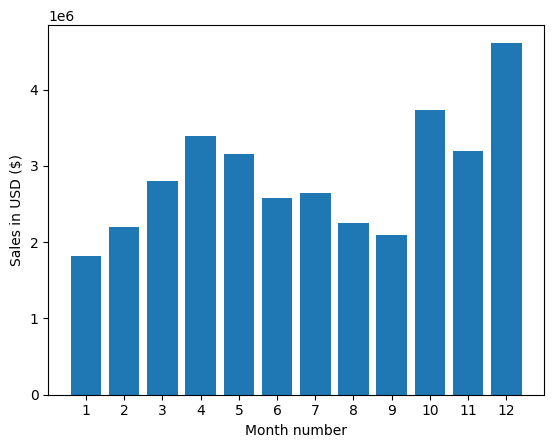

In [45]:
months = range(1,13)
plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


In [48]:
#What city sold the most product?
df.groupby(['City'])[['Quantity Ordered','Price Each','Month','Sales']].sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta-GA,16602,2779908.20,104794,2795498.58
Austin-TX,11153,1809873.61,69829,1819581.75
Boston-MA,22528,3637409.77,141112,3661642.01
Dallas-TX,16730,2752627.82,104620,2767975.40
Los Angeles-CA,33289,5421435.23,208325,5452570.80
New York City-NY,27932,4635370.83,175741,4664317.43
Portland-ME,2750,447189.25,17144,449758.27
Portland-OR,11303,1860558.22,70621,1870732.34
San Francisco-CA,50239,8211461.74,315520,8262203.91


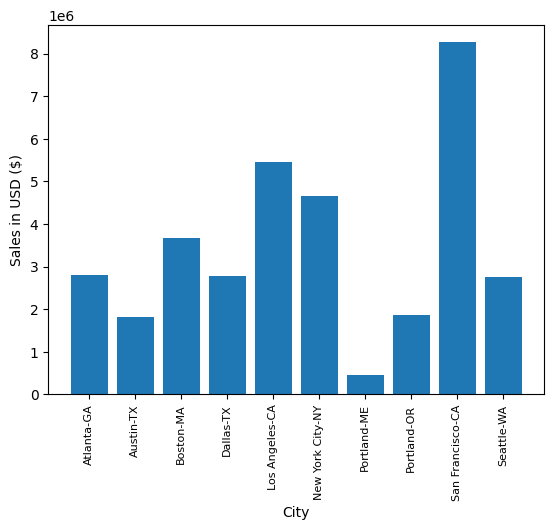

In [57]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()

plt.bar(city_sales['City'], city_sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)
plt.show()

What time should we display advertisements to maximize likelihood of customer's buying product?

In [58]:
# Add hour column
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_18132\2927689057.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
C:\Users\adity\AppData\Local\Temp\ipykernel_18132\2927689057.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas-TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston-MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles-CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles-CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles-CA,11.99,9,27,1


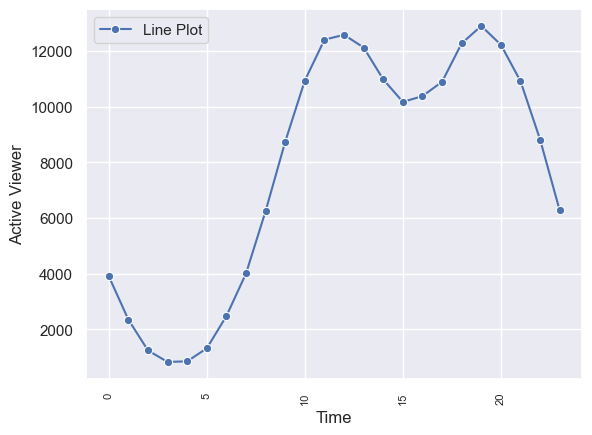

In [74]:
import seaborn as sns



view = df.groupby('Hour')['Count'].sum().reset_index()

sns.set()
sns.lineplot(x='Hour', y='Count', data=view, marker='o', label='Line Plot')


plt.ylabel('Active Viewer')
plt.xlabel('Time')
plt.xticks(rotation='vertical', size=8)
plt.show()

# my response will be to run adds btw early morning(7-10am) or evening (4-8pm)

What products are most often sold together?


In [75]:
df2 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df2['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df3 = df2[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\adity\AppData\Local\Temp\ipykernel_18132\566701224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [77]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


maximum sold item


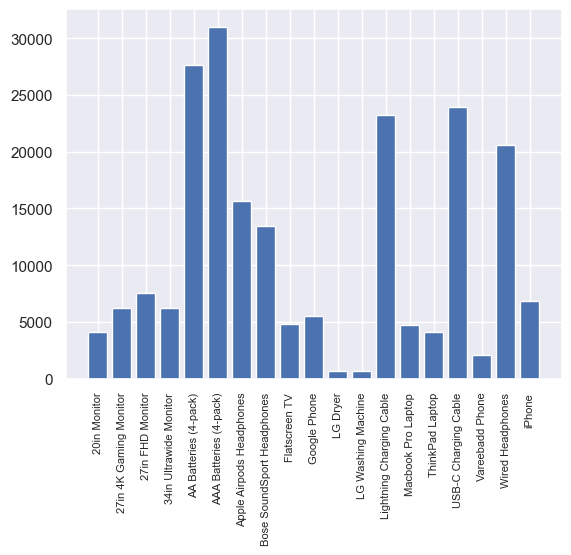

In [78]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, _ in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

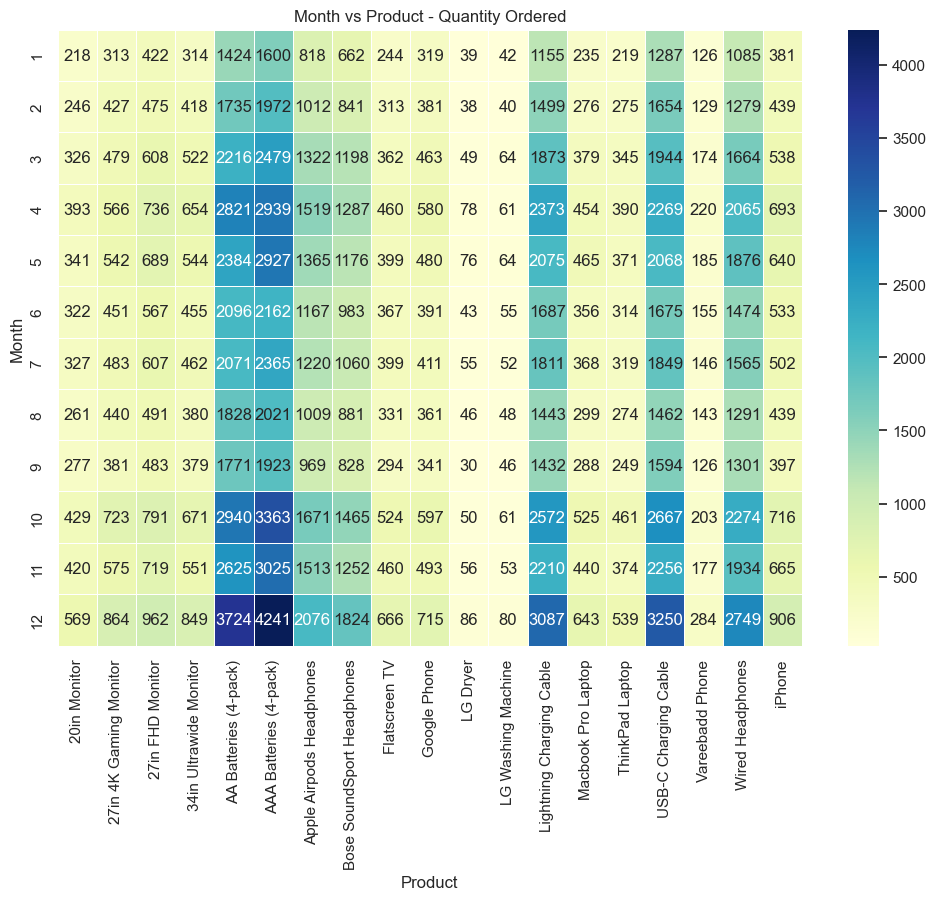

In [95]:
pivot_table = df.pivot_table(index='Month', columns='Product', values='Quantity Ordered', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Product')
plt.ylabel('Month')

plt.title('Month vs Product - Quantity Ordered')
plt.show()


electronic goods with lower costs tend to sell more frequently. Specifically, 
you've noted a hierarchy in sales, starting with low-cost electronic items such as day-to-day electronics, 
followed by phones and laptops, and then more significant appliances like washing machines and TVs.

This insight suggests a correlation between the affordability of electronic goods and their sales volume. It could be influenced by consumer preferences, budget constraints, and the frequency of need for these different categories of products. As a result, businesses may consider emphasizing product availability, pricing strategies, and marketing efforts based on the observed patterns to capitalize on consumer behavior in the electronic goods market

Additionally, a noteworthy observation is the occurrence of a sudden spike in sales during the Christmas season. The sales data indicates a distinct increase in the purchase of electronic goods, including phones, laptops, washing machines, and TVs, around the Christmas period. This surge in demand during the holiday season could be attributed to festive gifting, promotions, and the tradition of making electronic purchases as gifts.

Recognizing and understanding this seasonal trend is crucial for businesses to plan and strategize effectively. Capitalizing on the heightened demand during Christmas through targeted marketing campaigns, special promotions, and adequate stock management can optimize sales and enhance overall business performance during this festive period. The combination of affordable day-to-day electronics and the allure of higher-end products during Christmas creates a dynamic sales landscape that businesses can leverage for success.
